In [1]:
# importing the libraries

# open cv for image processing
# “CVV” stands for “Card Verification Value” which is used to read, save and display the image
import cv2

# math - used for basic math operation
import math

# numpy - used for manipulating array/matrix
import numpy as np

# matplotlib.pyplot - used for data visualization
import matplotlib.pyplot as plt

# sqrt - used to calculate the square root
# acos - used to returns the arc cosine of x in radians.
# degrees - used to converts an angle from radians to degrees.
from math import sqrt, acos, degrees

# for creating a GUI
import tkinter as tk

In [2]:
# kernel or filter used to apply on the image
kernel = np.ones((5,5),np.uint8)
print(kernel)# ->[[1 1 1 1 1] [1 1 1 1 1] [1 1 1 1 1] [1 1 1 1 1] [1 1 1 1 1]]
print(kernel.shape) # ->  (5,5)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
(5, 5)


[[[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 ...

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]]
(480, 852, 3)
AxesImage(54,36;334.8x217.44)


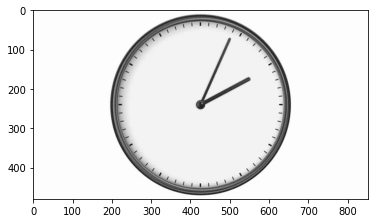

In [3]:
# reading the image data in the form of pixcel values
img = cv2.imread('input1.jpg')
print(img) # -> [[253 253 253] [253 253 253] ... [253 253 253] [253 253 253]]
print(img.shape) # -> (480, 852, 3)
print(plt.imshow(img)) # -> displays the image BGR

In [4]:
# reading the image data in the form of pixcel values
# 0 - cv2.IMREAD_GRAYSCALE: It specifies to load an image in grayscale mode.
# Alternatively, we can pass integer value 0 for this flag.
# img = cv2.imread('input1.jpg', 0)
# print(img)  -> [253 253 253 ... 253 253 253]
# print(img.shape)  -> (480, 852)
# print(plt.imshow(img))  -> displays the image  as a gray image

[[253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 ...
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]]
(480, 852)
AxesImage(54,36;334.8x217.44)


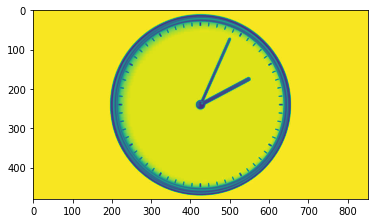

In [5]:
# converting the BGR image to the gray scale image
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray_img)  # -> [253 253 253 ... 253 253 253]
print(gray_img.shape)  # -> (480, 852)
print(plt.imshow(gray_img))  # -> displays the image  as a gray image


In [6]:
# cv2.threshold - used to separate an object from the background in the image
# The first argument is the source image, which should be a grayscale image.
# The second argument is the threshold value which is used to classify the pixel values.
# The third argument is the maximum value which is assigned to pixel values exceeding the threshold.
# THRESH_BINARY function transforms a grayscale image to a binary image
ret, thresh = cv2.threshold(gray_img, 50, 255, cv2.THRESH_BINARY)

print(ret)  # -> 50.0
print(thresh) # -> [255 255 255 ... 255 255 255]


50.0
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [7]:
# Creating the mask
height, width = gray_img.shape
print("\nheight :",height) # -> 480
print("\nwidth :",width) # -> 854

mask = np.zeros((height,width), np.uint8)
print("\nmask :",mask) # -> [0 0 0 ... 0 0 0]



height : 480

width : 852

mask : [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



edges : [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

edges shape: (480, 852)
AxesImage(54,36;334.8x217.44)


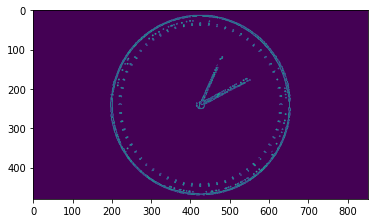

In [8]:
# detecting the edges of the image
# cv2.Canny - used to detect a wide range of edges in images , Noise Reduction.
# The Process of Canny edge detection algorithm can be broken down to 5 different steps:
# 1. Apply Gaussian filter to smooth the image in order to remove the noise.
# 2. Find the intensity gradients of the image.
# 3. Apply non-maximum suppression to get rid of spurious response to edge detection
# 4. Apply double threshold to determine potential edges.
# 5. Track edge by hysteresis: Finalize the detection of edges by suppressing all the other edges that are weak and not connected to strong edges.

edges = cv2.Canny(thresh, 100, 200)
print("\nedges :", edges)  # -> [0 0 0 ... 0 0 0]
print("\nedges shape:", edges.shape) # -> (480, 852)
print(plt.imshow(edges)) # -> less edges


[[[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 ...

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [253 253 253]]]
(480, 852, 3)
AxesImage(54,36;334.8x217.44)


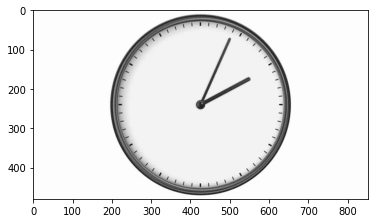

In [9]:
# converting the gravy image into to BGR image
cimg=cv2.cvtColor(gray_img, cv2.COLOR_GRAY2BGR)
print(cimg) # -> [[253 253 253] [253 253 253] ... [253 253 253] [253 253 253]]
print(cimg.shape) # -> (480, 852, 3)
print(plt.imshow(cimg)) # -> displays the image BGR


In [10]:
# A circle is represented mathematically as (x−xcenter)2+(y−ycenter)2=r2
# where (xcenter,ycenter) is the center of the circle, and r is the radius
# HoughCircles - finds circles in a grayscale image using a modification of the Hough transform.
# Hough Gradient Method which uses the gradient information of edges.
# dp - inverse ratio of the accumulator resolution to the image resolution.
# For example, if dp = 1 , the accumulator has the same resolution as the input image.
# If dp = 2 , the accumulator has half as big width and height.
# 100 - minimum distance between the centers of the detected circles.
circles = cv2.HoughCircles(gray_img, cv2.HOUGH_GRADIENT, 1.2, 100)
print(circles) # -> [[[429.00003 240.6     226.20001]]]
print(circles.shape) # -> (1, 1, 3)


[[[429.00003 240.6     226.20001]]]
(1, 1, 3)


In [11]:
for i in circles[0,:]:
  # print(i) # -> [429.00003 240.6     226.20001]
  i[2] = i[2] + 4
  # print(i) # -> [429.00003 240.6     230.20001]

  # Drawing on mask
  # used to detect the circle in the image
  cv2.circle(mask, (int(i[0]), int(i[1])), int(i[2]), (255,255,255), thickness=-1)



masked Data : [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]

masked Data shape: (480, 852, 3)
AxesImage(54,36;334.8x217.44)


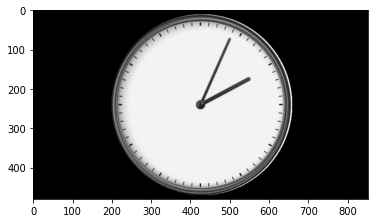

In [12]:
# Copy that image using that mask
# Bitwise operations are used in image manipulation and used for extracting essential parts in the image
# Syntax: cv2.bitwise_or(source1, source2, destination, mask)
# Parameters:
# source1: First Input Image array(Single-channel, 8-bit or floating-point)
# source2: Second Input Image array(Single-channel, 8-bit or floating-point)
# dest: Output array (Similar to the dimensions and type of Input image array)
# mask: Operation mask, Input / output 8-bit single-channel mask

masked_data = cv2.bitwise_and(img, img, mask=mask)
print("\nmasked Data :", masked_data) # [0 0 0]
print("\nmasked Data shape:", masked_data.shape)  # (480, 852, 3)
print(plt.imshow(masked_data)) # display the clock region with black background


In [13]:
# Applying Threshold
_,thresh = cv2.threshold(mask,1,255,cv2.THRESH_BINARY)
print(thresh) # -> [0 0 0 ... 0 0 0]



[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [14]:
# Find Contour
# findContours - retrieves contours from the binary image
# RETR_EXTERNA - retrieves only the extreme outer contours
# CHAIN_APPROX_SIMPLE - Returns only the endpoints that are necessary for drawing the contour line.
contours,hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
print("\ncontours :",contours) # ([array([[[359,   0]], [[358,   1]], [[356,   1]], ...



contours : [array([[[429,  10]],

       [[428,  11]],

       [[408,  11]],

       ...,

       [[451,  12]],

       [[450,  11]],

       [[430,  11]]], dtype=int32)]


In [15]:
# boundingRect - used to draw an approximate rectangle around the binary image
# geting the x axis, y axis , width and height
x,y,w,h = cv2.boundingRect(contours[0])
# print(x) # 179
# print(y) # 0
# print(w) # 501
# print(h) # 480



crop data: [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]

crop data shape: (401, 401, 3)
AxesImage(54,36;334.8x217.44)


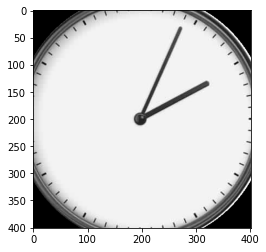

In [16]:
# Crop masked_data
crop = masked_data[y + 30 : y + h - 30, x + 30 : x + w - 30]
print("\ncrop data:",crop) # [0 0 0]
print("\ncrop data shape:",crop.shape) # (420, 441, 3)
print(plt.imshow(crop)) # contains the circle region


In [17]:

# copying the coped data to i variable
i=crop

height, width, channels = i.shape
print(width, height, channels) # 441 420 3


401 401 3


In [18]:
# cv2.threshold - used to separate an object from the background in the image
# The first argument is the source image, which should be a grayscale image. 
# The second argument is the threshold value which is used to classify the pixel values. 
# The third argument is the maximum value which is assigned to pixel values exceeding the threshold.
# THRESH_BINARY function transforms a grayscale image to a binary image
ret, mask = cv2.threshold(i, 10, 255, cv2.THRESH_BINARY)
print(ret) # -> 10.0
print(mask) # -> [0 0 0]


10.0
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]



edges : [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

edges shape: (401, 401)
AxesImage(54,36;334.8x217.44)


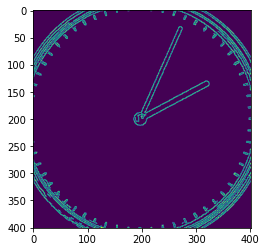

In [19]:
# detecting the edges of the image
# cv2.Canny - used to detect a wide range of edges in images , Noise Reduction
# The Process of Canny edge detection algorithm can be broken down to 5 different steps:
# 1. Apply Gaussian filter to smooth the image in order to remove the noise.
# 2. Find the intensity gradients of the image.
# 3. Apply non-maximum suppression to get rid of spurious response to edge detection
# 4. Apply double threshold to determine potential edges.
# 5. Track edge by hysteresis: Finalize the detection of edges by suppressing all the other edges that are weak and not connected to strong edges.

edges = cv2.Canny(i,100,200)
print("\nedges :", edges)  # -> [0 0 0 ... 0 0 0]
print("\nedges shape:", edges.shape) # -> (401, 401)
print(plt.imshow(edges)) # -> more edges than previous one


In [20]:
# kernel or filter used to apply on the image
kernel = np.ones((11,11),np.uint8)
print(kernel) #->[1 1 1 1 1 1 1 1 1 1 1]
print(kernel.shape) #->  (11,11)


[[1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1]]
(11, 11)


In [21]:
kernel1 = np.ones((13,13),np.uint8)
print(kernel1) #->[1 1 1 1 1 1 1 1 1 1 1 1 1]
print(kernel1.shape) #->  (13,13)


[[1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]]
(13, 13)



edges : [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

edges shape: (401, 401)
AxesImage(54,36;334.8x217.44)


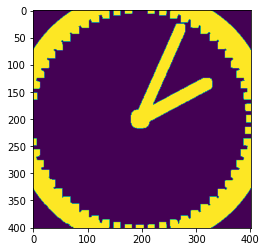

In [22]:
# cv2.dilate = To apply a morphological filter to images in Python using OpenCV
edges = cv2.dilate(edges,kernel,iterations = 1)
print("\nedges :", edges)  # -> [0 0 0 ... 0 0 0]
print("\nedges shape:", edges.shape) # -> (401, 401)
print(plt.imshow(edges)) # -> more edges than previous one



edges : [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

edges shape: (401, 401)
AxesImage(54,36;334.8x217.44)


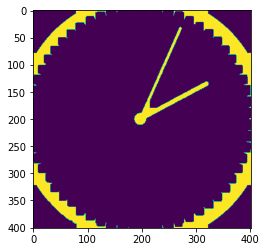

In [23]:
# cv2.erode - used to perform erosion on the image, just like soil erosion
# it erodes away the boundaries of foreground object (Always try to keep foreground in white)
# A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1,
# otherwise it is eroded (made to zero).
edges = cv2.erode(edges,kernel1,iterations = 1)
print("\nedges :", edges)  # -> [0 0 0 ... 0 0 0]
print("\nedges shape:", edges.shape) # -> (401, 401)
print(plt.imshow(edges)) # -> more edges than previous one


In [24]:
# defining the minimum length of the line
minLineLength = 1000

# maximium gap between the line
maxLineGap = 10


In [25]:
# HoughLinesP - used for line segments / lines detection
# cv2.HoughLinesP(image, rho, theta, threshold[, lines[, minLineLength[, maxLineGap]]])
# edges: Output of the edge detector.
# lines: A vector to store the coordinates of the start and end of the line.
# rho  = 1: The resolution parameter \rho in pixels.
# theta = np.pi/180: The resolution of the parameter \theta in radians.
# threshold = 15 : The minimum number of intersecting points to detect a line.

lines = cv2.HoughLinesP(edges,
                        1,
                        np.pi/180,
                        15,
                        minLineLength,
                        maxLineGap)

print(lines) # -> [[216 162 246  84]] [[ 17  62  94   0]]
print(lines.shape) # -> (295, 1, 4)


[[[216 162 246  84]]

 [[ 17  62  94   0]]

 [[ 12 330  31 318]]

 ...

 [[352 367 365 354]]

 [[328  14 339  25]]

 [[ 13  68  24  60]]]
(295, 1, 4)


In [26]:

# initailing the xl , yl, xs and ys as 0

# contains all the lines
l=[] 

# l -> long, s -> short
xl1, xl2, yl1, yl2 = 0, 0, 0 , 0

xs1, xs2, ys1, ys2=0, 0, 0 , 0


In [27]:
for line in lines:

    # getting the values from the line
    x1, y1, x2, y2 = line[0]
    # print(x1, y1, x2, y2) # -> 216 162 246 84

    # finding difference of x1 and x2
    dx = x2 - x1
    # print(dx) # -> 30, maxmium value is postive and zeros only no negative values

    # if negative value is obtained then the negative value will be converted into positive value
    if(dx<0):
        dx = dx * -1
        # print(dy) # -> all values will be set to positive values

    # finding difference of y1 and y2
    dy = y2 - y1
    # print(dy) # -> -78, Mixed value of both positive and negative

    # if negative value is obtained then the negative value will be converted into positive value
    if(dy < 0):
        dy = dy * -1
        # print(dy) # -> 78, all values will be set to positive values

    # calculating the sqrt of the dx and dy
    hypo = sqrt(dx ** 2 + dy ** 2 )
    # print(hypo) # -> 83.57032966310472

    l.append(hypo)

print(l) #-> [83.57032966310472, 98.85848471426213 ..... ]


[83.57032966310472, 98.85848471426213, 22.47220505424423, 21.95449840010015, 44.28317965096906, 52.32590180780452, 53.14132102234569, 131.13733259449805, 49.49747468305833, 150.26975743641833, 40.607881008493905, 61.40032573203501, 117.37972567696688, 14.142135623730951, 120.93386622447825, 14.142135623730951, 121.82364302548172, 107.62899237658968, 127.47548783981962, 50.20956084253277, 20.615528128088304, 142.8355697996826, 67.88225099390856, 41.773197148410844, 114.10959644131601, 130.17680284904833, 32.64965543462902, 99.35793878699377, 151.60804727981954, 57.0087712549569, 128.69343417595164, 42.5205832509386, 33.301651610693426, 94.89467845985885, 56.586217403180434, 69.42621983083913, 15.556349186104045, 31.11269837220809, 50.24937810560445, 58.008620049092706, 50.91168824543142, 13.601470508735444, 87.68124086713189, 21.400934559032695, 75.92759709091287, 118.3427226321923, 48.08326112068523, 108.07404868885037, 21.93171219946131, 26.870057685088806, 46.87216658103186, 32.55764

In [28]:

a=len(l) # -> 295

# sorting the value in reverse order
l.sort(reverse=True)
# print(l) # -> [151.60804727981954, 150.26975743641833, ...]

# for minutes hand
m=0

# for hours hand
h=0

# the loop will be running for 295 times so the values in this loop is not accurate and the values were based on the previous loop

for f in range(a):
    
    for line in lines:
        
        # getting the values from the line
        x1, y1, x2, y2 = line[0]
        
        # print(x1, y1, x2, y2) # -> 216 162 246 84
        
        # finding difference of x1 and x2
        dx = x2 - x1
        # print(dx) # -> 30, maxmium value is postive and zeros only no negative values
        
        # if negative value is obtained then the negative value will be converted into positive value
        if(dx < 0):
            dx = dx * -1
            # print(dy) # -> all values will be set to positive values
            
        # finding difference of y1 and y2
        dy = y2 - y1
        # print(dy) # -> -78, Mixed value of both positive and negative 
        
        # if negative value is obtained then the negative value will be converted into positive value
        if(dy < 0):
            dy = dy * -1
            # print(dy) # -> 78, all values will be set to positive values
        
        # calculating the sqrt of the dx and dy
        hypo2 = sqrt(dx ** 2 + dy ** 2 )
        # print(hypo) # -> 83.57032966310472
        
        if(hypo2 == l[0]):
            m = hypo2
            xl1 = x1
            xl2 = x2
            yl1 = y1
            yl2 = y2
            
            # getting line region
            cv2.line(crop, (xl1, yl1), (xl2, yl2), (255, 0, 0), 3)
            print("xl1 =",xl1," yl1 =",yl1," xl2 =",xl2," yl2 =",yl2)
            # -> xl1 = 186  yl1 = 200  xl2 = 322  yl2 = 133, the maximum values of x1, y1, x2, y2 accordingly
            
        if(m==l[0]):
            
            if(hypo2 ==l[f]):
                
                if((sqrt((xl2 - x2)**2 + (yl2 - y2)**2)) > 20):
                    
                    if((sqrt((xl1 - x1)**2 + (yl1 - y1)**2))>20):
                        
                        xs1 = x1
                        xs2 = x2
                        ys1 = y1
                        ys2 = y2
                        
                        # getting line region
                        cv2.line(crop, (xs1, ys1), (xs2, ys2), (0, 255, 0), 3)
                        print("xs1 =",xs1," ys1 =",ys1," xs2 =",xs2," ys2 =",ys2)
                        # xs1 = 299  ys1 = 400  xs2 = 400  ys2 = 299
                        h=1
                        break
    
    if(h==1):
        break


xl1 = 186  yl1 = 200  xl2 = 322  yl2 = 133
xl1 = 186  yl1 = 200  xl2 = 322  yl2 = 133
xs1 = 299  ys1 = 400  xs2 = 400  ys2 = 299


In [29]:
# Calculating the center point

xcenter = int(width / 2)
ycenter = int(height / 2)
print('xcenter=' ,xcenter,"ycenter=",ycenter)
# xcenter= 200 ycenter= 200


xcenter= 200 ycenter= 200


In [30]:
# Determine the coordinates of the end point (farther from the center)

hour1 = abs(xcenter - xs1)
hour2 = abs(xcenter - xs2)
# print('hour1 =' ,hour1,"hour2 =",hour2)
# hour1 = 98.5 hour2 = 199.5

if(hour1 > hour2):
    xhour = xs1
    yhour = ys1
else:
    xhour = xs2
    yhour = ys2

print('xhour =' ,xhour,"yhour =",yhour)
# xhour = 400 yhour = 299


xhour = 400 yhour = 299


In [31]:
min1 = abs(xcenter - xl1)
min2 = abs(xcenter - xl2)
# print('min1 =' ,min1,"min2 =",min2)
# min1 = 14.5 min2 = 121.5

if(min1 > min2):
    xmin = xl1
    ymin = yl1
else:
    xmin = xl2
    ymin = yl2

print('xmin =' ,xmin,"ymin =",ymin)
# xmin = 322 ymin = 133


xmin = 322 ymin = 133


In [32]:
# Calculating theta(0) of each line using the law of cosines
# In trigonometry, the law of cosines (also known as the cosine formula, cosine rule, or al-Kashi's theorem[1]) 
# relates the lengths of the sides of a triangle to the cosine of one of its angles

# calculating theta for hour hand
# l1, l2, l3 - 3 side of a triangle
l1 = sqrt( ((xcenter - xhour) ** 2) + ((ycenter - yhour) ** 2) )
# print(l1) #-> 223.16137658654108

l2 = ycenter
# print(l2) # -> 200

l3 = sqrt( ((xcenter - xhour) ** 2) + ((0 - yhour) ** 2) )
# print(l3) # -> 359.723504931218

# cos = (a ** 2 + b ** 2 - c ** 2) / ( 2(a)(b) )

cos_theta_hour = ( ( (l1) ** 2 ) + ( (l2) ** 2 ) - ( (l3) ** 2) ) / ( 2 * (l1) * (l2) )
print('cos_theta_hour :',cos_theta_hour) # -> -0.44362515375328937

# acos - used to returns the arc cosine of x in radians.
theta_hours_radian = acos(cos_theta_hour)
print('theta_hours_radian :',theta_hours_radian) # -> 2.030435941225279

# degrees - used to converts an angle from radians to degrees
theta_hours = math.degrees(theta_hours_radian)
print('theta_hours :',theta_hours) # ->116.33541000388135


cos_theta_hour : -0.44362515375328937
theta_hours_radian : 2.030435941225279
theta_hours : 116.33541000388135


In [33]:
# Determine left half or right half

if(xhour > xcenter):
    right=1

else:
    right=0

# print('right =', right) # -> 1

if(right==1):
    hour = int(theta_hours / (6*5))

if(right==0):
    hour = 12 - (int(theta_hours / (6*5)))

if(hour==0):
    hour=12

# print('hours=' ,hour) # -> 3


In [34]:
# calculating theta for minutes hand
# l1, l2, l3 - 3 side of a triangle
l1 = sqrt( ((xcenter - xmin) ** 2) + ((ycenter - ymin) ** 2) )
# print(l1) #-> 139.18692467326088

l2 = ycenter
# print(l2) # -> 200

l3 = sqrt( ((xcenter - xmin) ** 2) + ((0 - ymin) ** 2) )
# print(l3) # -> 180.47991578012218

# cos = (a ** 2 + b ** 2 - c ** 2) / ( 2(a)(b) )

cos_theta_min = ( ( (l1) ** 2 ) + ( (l2) ** 2 ) - ( (l3) ** 2) ) / ( 2 * (l1) * (l2) )
print('cos_theta_min :',cos_theta_min) # -> 0.48136705482416153

# acos - used to returns the arc cosine of x in radians.
theta_min_radian = acos(cos_theta_min)
print('theta_min_radian :',theta_min_radian) # -> 1.0685826404927201

# degrees - used to converts an angle from radians to degrees
theta_min = math.degrees(theta_min_radian)
print('theta_min :',theta_min) # -> 61.225275361178205


cos_theta_min : 0.48136705482416153
theta_min_radian : 1.06858264049272
theta_min : 61.22527536117819


In [35]:
# Determine left half or right half

if(xmin > xcenter):
    right=1

else:
    right=0

# print('right =', right) # -> 1

if(right==1):
    minute = int(theta_min / ((6*5)/5))

if(right==0):
    minute = 60 - (int(theta_min / ((6*5)/5)))
    if(xmin == xcenter):
        minutes=30


# print('minute=' ,minute) # -> 2


In [36]:

# if the minutes is less than 10
if (minute < 10):
    # function to assign the hours and minutes
    def display():
        # in the format of hours:minutes
        value = "{}:0{}".format(hour,minute)
        print(value)
        digit.config(text = value)
else:
    # function to assign the hours and minutes
    def display():
        # in the format of hours:minutes
        value = "{}:{}".format(hour,minute)
        print(value)
        digit.config(text = value)


In [37]:
# creating the GUI/tkinter window
canvas = tk.Tk()

# title for the window
canvas.title("Analog to Digital")

# display size of the window
canvas.geometry("300x250")

# adding up the display features like background color, font color and font property
digit = tk.Label(canvas, font=("ds-digital", 65, "bold"), bg="black", fg="blue", bd = 80)

# making the grid position
digit.grid(row=0, column = 1)

# calling the function and displaying the value
display()

# mainloop - infinite loop used to run the application, wait for an event to occur 
# process the event as long as the window is not closed.
canvas.mainloop()

3:10
